## Check Password Strength Using ML algorithms

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("../input/password-strength-classifier-dataset/data.csv",',',error_bad_lines=False)

In [ ]:
data.head()

In [ ]:
data[data['password'].isnull()]

In [ ]:
data.dropna(inplace=True)

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
y = data['strength']

In [ ]:
y.head()

In [ ]:
X = data['password']

In [ ]:
X.head()

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='strength',data=data)

In [ ]:
def words_to_char(inputs):
    characters=[]
    for i in inputs:
        characters.append(i)
    return characters

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(tokenizer=words_to_char)
X=vectorizer.fit_transform(X)

In [ ]:
X.shape

In [ ]:
X.todense()

In [ ]:
vectorizer.vocabulary_

In [ ]:
data.iloc[0][0]

In [ ]:
feature_names = vectorizer.get_feature_names()
 
#get tfidf vector for first document
first_document_vector=X[0]
 
#print the scores
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

In [ ]:
## Logistics Regression

from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)  #splitting


ONE-ONE and ONE-REST

https://datastoriesweb.wordpress.com/2017/06/11/classification-one-vs-rest-and-one-vs-one/

In [ ]:
log_class=LogisticRegression(penalty='l2',multi_class='ovr')
log_class.fit(X_train,y_train)

In [ ]:
print(log_class.score(X_test,y_test))

Checkout LDA and QDA:

https://datastoriesweb.wordpress.com/2017/06/16/on-lda-qda/

Python Logistic Regression solvers:

https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions

Hessian function: The Hessian is a square matrix of second-order partial derivatives of order nxn

https://stats.stackexchange.com/questions/68391/hessian-of-logistic-function

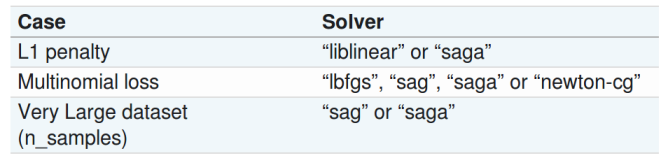


In [ ]:
## Multinomial

clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='saga')
clf.fit(X_train, y_train) #training
print(clf.score(X_test, y_test))

In [ ]:
X_predict=np.array(["2DFSabc#d$$$$"])
X_predict=vectorizer.transform(X_predict)
y_pred=log_class.predict(X_predict)
print(y_pred)